# Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset1.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)
#print (y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# Calling the XGB Regressor

In [2]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 67)

# Applying Grid Search to find the best model and the best parameters

In [4]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900],
               'max_depth': [2, 3, 4, 5, 6, 7, 8],
               'gamma': [5, 1, 0.1, 0.01, 0.001, 0.0001],
               'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.5, 0.9]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.983230710334755
Best Parameters: {'gamma': 0.01, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 1600}


# Training the XGB Regression model on the Training set

In [3]:
regressor = XGBRegressor(n_estimators = 1600,
                         max_depth = 2,
                         gamma = 0.01, 
                         learning_rate = 0.5,
                         random_state = 67)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1600,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=67,
             reg_alpha=0, reg_lambda=1, ...)

## Create a KFold object with 5 splits 

In [4]:
#regressor.fit (X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())

[0.98111663 0.9958024  0.99572885 0.95905941 0.98444626]
0.983230710334755


## Predicting the Test set results

In [5]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 20.74  20.56]
 [321.04 323.97]
 [117.91 114.25]
 [ 57.28  74.26]
 [295.04 293.22]
 [128.66 136.86]
 [ 92.96  99.  ]
 [140.32 138.  ]
 [364.99 385.24]
 [ 95.29 103.36]
 [143.75 148.77]
 [235.8  239.61]
 [ 89.1   90.43]
 [ 30.92  33.86]
 [177.9  170.01]
 [ 27.86  27.91]
 [ 62.25  61.02]
 [ 21.21  22.34]
 [ 29.72   3.04]
 [ 64.89  71.26]
 [374.89 377.38]
 [ 77.41  79.63]
 [ 67.85  73.54]
 [ 42.88  40.54]
 [206.55 204.93]
 [ 26.52  28.38]
 [179.14 159.3 ]
 [ 70.52  74.79]
 [107.55 103.92]
 [ 64.44  65.63]
 [167.71 164.29]
 [ 53.91  52.29]
 [ 48.76  48.96]
 [  3.52   5.49]
 [152.03 151.27]
 [ 51.56  54.48]
 [102.7   96.38]
 [105.37 105.61]
 [ 56.41  64.6 ]
 [103.21  97.63]
 [ 55.23  51.99]
 [101.52  95.93]
 [271.8  271.69]
 [120.5  118.52]
 [169.96 142.84]
 [128.23 124.71]
 [136.63 135.44]
 [ 28.06  24.41]
 [ 16.94  17.94]
 [334.25 367.34]
 [ 46.66  49.1 ]
 [128.68 136.91]
 [ 67.94  67.7 ]
 [206.15 202.75]
 [344.94 343.73]
 [ 88.74  85.17]
 [172.32 172.47]
 [180.92 179.97]
 [ 16.87  15.0

## Evaluating the Model Performance

### R2

In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9904995986251893


## Adjusted R2

In [7]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9901376785728155


### RMSE

In [8]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

9.230685327738332

### MAE

In [9]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

5.395788327575034

## Visualize

Text(0, 0.5, 'Predicted data')

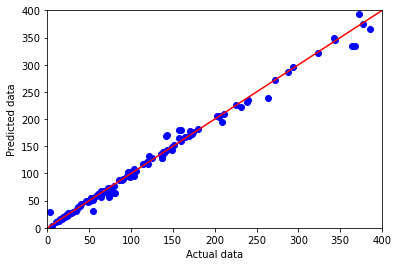

In [10]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,400],[0,400], color = "red")
plt.axis ([0,400,0,400])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

Text(250, 75, 'Adj.$R^2$ = 0.990')

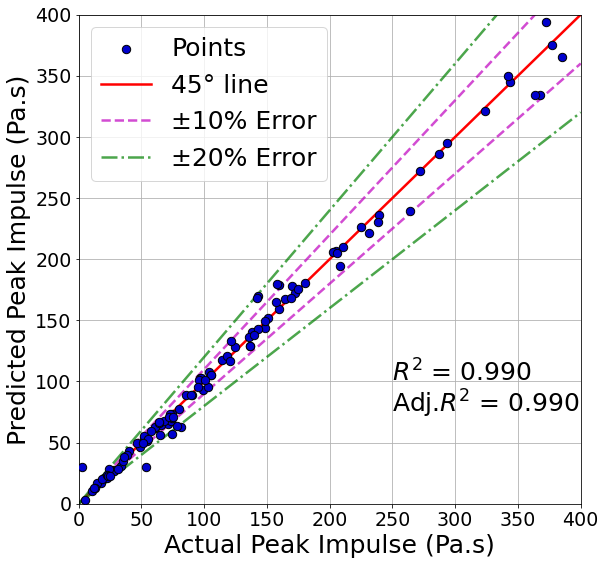

In [14]:
# Generate data

from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,400)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 400)
plt.xlim(0, 400)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



ax.annotate("$R^2$ = {:.3f}".format(r2), (250, 100),fontsize = 25)  #Model is called here
ax.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (250, 75),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [15]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))

Within 10% margin 88.18%
Within 20% margin 95.45%


## <100 Pa.s

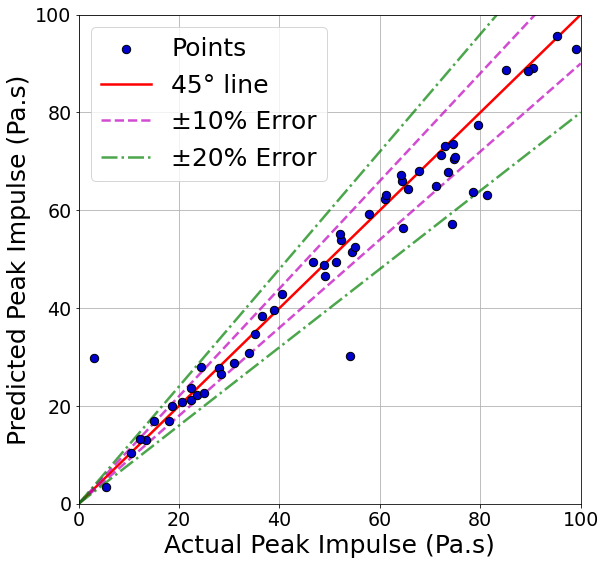

In [16]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,100)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (5000, 2000),fontsize = 25)  #Model is called here

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

## Print Output

In [ ]:
df = pd.DataFrame(file).T
df.to_excel(excel_writer = "E:\PhD\Machine Learning\Impulse_paper1/Output_XGBoost.xlsx")